In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

import joblib

In [71]:
colors = px.colors.sequential.Magma

# get data

In [33]:
#cvd_df = pd.read_csv("CVD_cleaned.csv")
cvd_adj = pd.read_csv("cvd_adj.csv")
cvd_cut = pd.read_csv("cvd_manually_cut.csv")
cvd_smotenc = pd.read_csv("cvd_smotenc.csv", compression="gzip")# de-compress


In [40]:
print(cvd_adj["Heart_Disease_Yes"].eq(True).sum())
print(cvd_adj["Heart_Disease_Yes"].eq(False).sum())
print(cvd_adj["Heart_Disease_Yes"].eq(True).sum()/(len(cvd_adj["Heart_Disease_Yes"])))
print(cvd_cut["Heart_Disease_Yes"].eq(True).sum()/(len(cvd_cut["Heart_Disease_Yes"])))
print(cvd_smotenc["Heart_Disease_Yes"].eq(True).sum()/(len(cvd_smotenc["Heart_Disease_Yes"])))
print(cvd_smotenc["Heart_Disease_Yes"].eq(True).sum())
print(cvd_smotenc["Heart_Disease_Yes"].eq(False).sum())

24971
283883
0.08085049894124732
0.4000032037419706
0.5
283883
283883


In [17]:
#cvd_df.info()

In [3]:
cvd_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 38 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          308854 non-null  float64
 1   Weight_(kg)                                          308854 non-null  float64
 2   BMI                                                  308854 non-null  float64
 3   Alcohol_Consumption                                  308854 non-null  float64
 4   Fruit_Consumption                                    308854 non-null  float64
 5   Green_Vegetables_Consumption                         308854 non-null  float64
 6   FriedPotato_Consumption                              308854 non-null  float64
 7   General_Health_Fair                                  308854 non-null  bool   
 8   General_Health_Good                                  3

In [4]:
cvd_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62427 entries, 0 to 62426
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          62427 non-null  float64
 1   Weight_(kg)                                          62427 non-null  float64
 2   BMI                                                  62427 non-null  float64
 3   Alcohol_Consumption                                  62427 non-null  float64
 4   Fruit_Consumption                                    62427 non-null  float64
 5   Green_Vegetables_Consumption                         62427 non-null  float64
 6   FriedPotato_Consumption                              62427 non-null  float64
 7   General_Health_Fair                                  62427 non-null  bool   
 8   General_Health_Good                                  62427 non-nul

In [5]:
cvd_smotenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567766 entries, 0 to 567765
Data columns (total 38 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          567766 non-null  float64
 1   Weight_(kg)                                          567766 non-null  float64
 2   BMI                                                  567766 non-null  float64
 3   Alcohol_Consumption                                  567766 non-null  float64
 4   Fruit_Consumption                                    567766 non-null  float64
 5   Green_Vegetables_Consumption                         567766 non-null  float64
 6   FriedPotato_Consumption                              567766 non-null  float64
 7   General_Health_Fair                                  567766 non-null  bool   
 8   General_Health_Good                                  5

# dataset performance on LR

In [23]:
def create_trainset(df):
    X = df.drop("Heart_Disease_Yes", axis=1)
    y = df["Heart_Disease_Yes"]
    randomstate = 42
    numerical_columns = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                         "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]
    
    
    standardscaler = StandardScaler()
    X_scaled = standardscaler.fit_transform(X[numerical_columns])
    
    categorical_columns = X.drop(numerical_columns, axis=1)

    full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])
    
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(full_data, y, test_size=0.2, random_state=randomstate)
    #note y is obviously not scaled
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

In [49]:
X_train_adj,X_test_adj,y_train_adj,y_test_adj = create_trainset(cvd_adj)
X_train_cut,X_test_cut,y_train_cut,y_test_cut = create_trainset(cvd_cut)
X_train_smotenc,X_test_smotenc,y_train_smotenc,y_test_smotenc = create_trainset(cvd_smotenc)

In [25]:
len(X_train_adj[0])

37

In [11]:
X = cvd_adj.drop("Heart_Disease_Yes", axis=1)
y = cvd_adj["Heart_Disease_Yes"]
randomstate = 42
numerical_columns = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                     "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]
    
    
standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(X[numerical_columns])
    
categorical_columns = cvd_adj.drop(numerical_columns, axis=1)

full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])

In [26]:
cvd_adj.iloc[1]

Height_(cm)                                            165.0
Weight_(kg)                                            77.11
BMI                                                    28.29
Alcohol_Consumption                                      0.0
Fruit_Consumption                                       30.0
Green_Vegetables_Consumption                             0.0
FriedPotato_Consumption                                  4.0
General_Health_Fair                                    False
General_Health_Good                                    False
General_Health_Poor                                    False
General_Health_Very Good                                True
Checkup_5 or more years ago                            False
Checkup_Within the past 2 years                        False
Checkup_Within the past 5 years                        False
Checkup_Within the past year                            True
Exercise_Yes                                           False
Heart_Disease_Yes       

In [27]:
#LR fit func

def LR_fit(x_train, x_test, y_train):
    lr = LogisticRegression(random_state=42)
    lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_test)
    
    return lr, lr_pred
    

In [76]:
lr_adj, lr_adj_pred = LR_fit(X_train_adj,X_test_adj,y_train_adj)
lr_cut, lr_cut_pred = LR_fit(X_train_cut,X_test_cut,y_train_cut)
lr_smotenc, lr_smotenc_pred = LR_fit(X_train_smotenc,X_test_smotenc,y_train_smotenc)

In [29]:
def result_report(y_test,y_test_pred,title):
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.99      0.96     56774
        True       0.51      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.72      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771



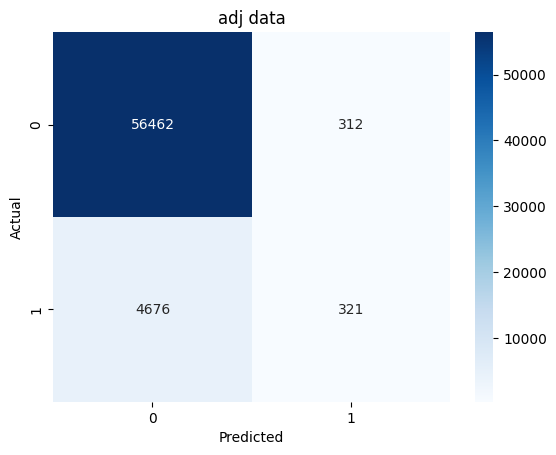

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.81      0.80      7395
        True       0.71      0.68      0.69      5091

    accuracy                           0.76     12486
   macro avg       0.75      0.74      0.75     12486
weighted avg       0.75      0.76      0.75     12486



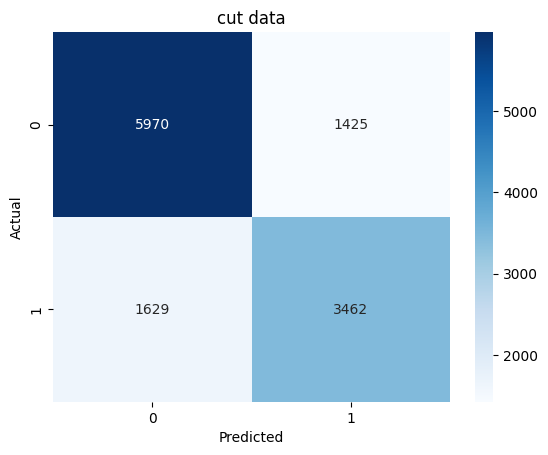

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.74      0.78     56701
        True       0.76      0.83      0.80     56853

    accuracy                           0.79    113554
   macro avg       0.79      0.79      0.79    113554
weighted avg       0.79      0.79      0.79    113554



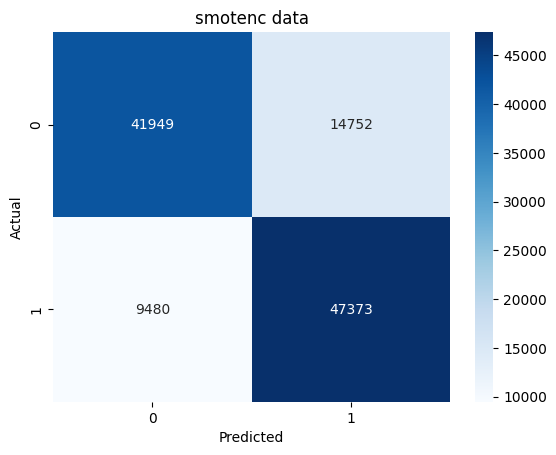

In [77]:
result_report(y_test_adj, lr_adj_pred, "adj data")
result_report(y_test_cut, lr_cut_pred, "cut data")
result_report(y_test_smotenc, lr_smotenc_pred, "smotenc data")

- https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html
- not we should look at maco average as we dont want to use a weighted answer as that will shadow how inaccurate the predictions are.
- if we were to use micro avg(accuracy) or weighted avg we se that in the confusion matrix we fail to predict a true positiv heart disease carrier.
- which would be the same as just saying that most patient doesn't have a heart disease even if they truly do
- note that in the cut and smote dataset the all the f1 scores averages converges as the dataset becomes balanced

fixing data imbalance made the models perform way better.
will the model which used syntetic data still deliver a good result on real data

In [80]:
X_train, X_test, y_train, y_test = create_trainset(cvd_adj)

In [58]:
X_test

array([[ 0.69288284,  0.12141331, -0.2094672 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5268572 , -0.19718971,  0.07570773, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24537873, -0.51626126, -0.43024779, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.22375206,  3.7342778 ,  4.00376236, ...,  0.        ,
         0.        ,  1.        ],
       [-2.8725111 , -1.10520831,  0.30415431, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5268572 , -0.40990408, -0.17880323, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
X_test_adj

array([[ 0.69288284,  0.12141331, -0.2094672 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5268572 , -0.19718971,  0.07570773, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24537873, -0.51626126, -0.43024779, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.22375206,  3.7342778 ,  4.00376236, ...,  0.        ,
         0.        ,  1.        ],
       [-2.8725111 , -1.10520831,  0.30415431, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5268572 , -0.40990408, -0.17880323, ...,  0.        ,
         0.        ,  0.        ]])

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.74      0.84     56774
        True       0.19      0.69      0.30      4997

    accuracy                           0.74     61771
   macro avg       0.58      0.72      0.57     61771
weighted avg       0.90      0.74      0.79     61771



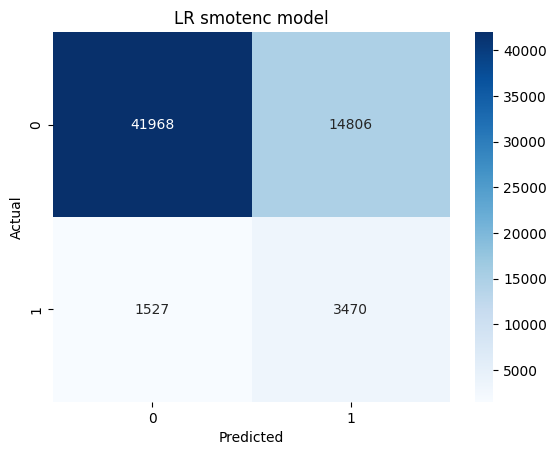

In [81]:
temp = lr_smotenc.predict(X_test)
result_report(y_test, temp, "LR smotenc model")

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.82      0.88     56774
        True       0.24      0.68      0.36      4997

    accuracy                           0.80     61771
   macro avg       0.61      0.75      0.62     61771
weighted avg       0.91      0.80      0.84     61771



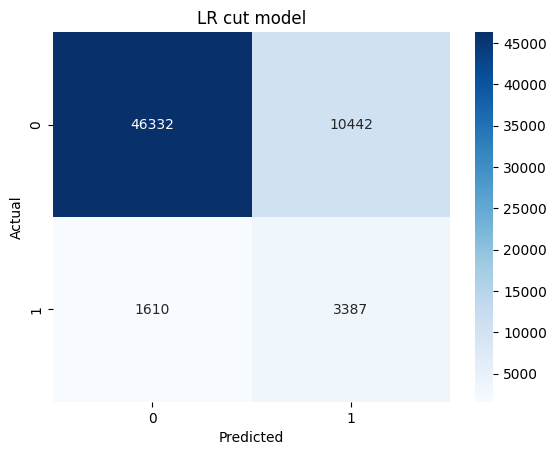

In [86]:
temp = lr_cut.predict(X_test)
result_report(y_test, temp, "LR cut model")

both models show some kind of overfitting which is not surpricing, but the syntetic data seems be "more" overfitted.

Thus we will continue to use the manaully cut data so that our next models will perform generally better on real data

What models to try
https://www.quora.com/Which-machine-learning-algorithms-are-appropriate-for-numerical-categorical-or-both-values
consensus seem to recommend Randomforest or a decision tree but LR and SVM are not suboptional.
we will continue with LR and add Randomforest
we will also try XGBoost which is a gradient-boosted decision tree
https://www.nvidia.com/en-us/glossary/xgboost/
we may aswell add an SVM model

In [41]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_cut, y_train_cut) 
rfc_pred = rfc.predict(X_test_cut)

In [42]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
#xbg.XGBRFClassifier() using randomforest https://xgboost.readthedocs.io/en/stable/tutorials/rf.html#
xgb_model.fit(X_train_cut, y_train_cut)
xgb_pred = xgb_model.predict(X_test_cut)

In [43]:
# note using standardscaled data on svm makes training significatly slower

svc = SVC(random_state=42)
svc.fit(X_train_cut, y_train_cut)
svc_pred = svc.predict(X_test_cut)

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.78      0.78      7395
        True       0.68      0.68      0.68      5091

    accuracy                           0.74     12486
   macro avg       0.73      0.73      0.73     12486
weighted avg       0.74      0.74      0.74     12486



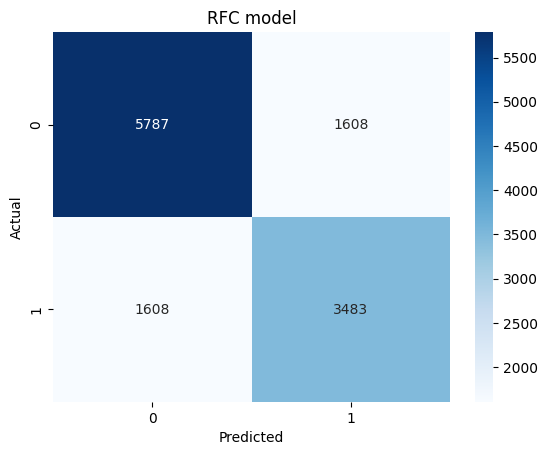

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.78      0.78      7395
        True       0.69      0.70      0.69      5091

    accuracy                           0.75     12486
   macro avg       0.74      0.74      0.74     12486
weighted avg       0.75      0.75      0.75     12486



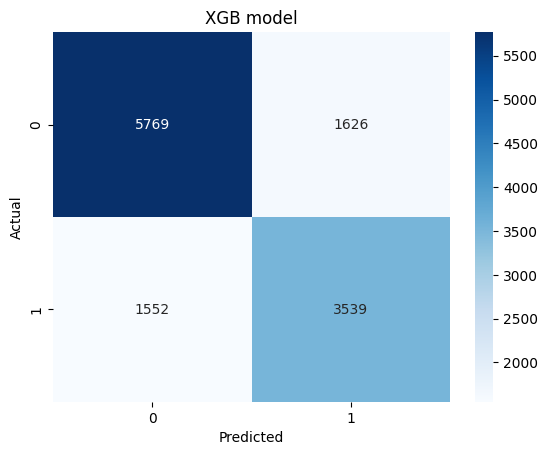

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.78      0.79      7395
        True       0.69      0.70      0.70      5091

    accuracy                           0.75     12486
   macro avg       0.74      0.74      0.74     12486
weighted avg       0.75      0.75      0.75     12486



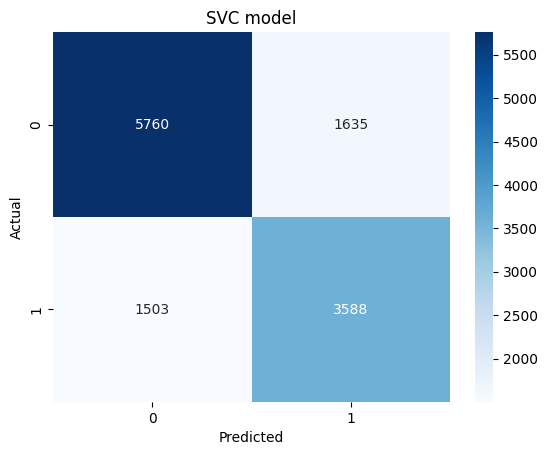

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.81      0.80      7395
        True       0.71      0.68      0.69      5091

    accuracy                           0.76     12486
   macro avg       0.75      0.74      0.75     12486
weighted avg       0.75      0.76      0.75     12486



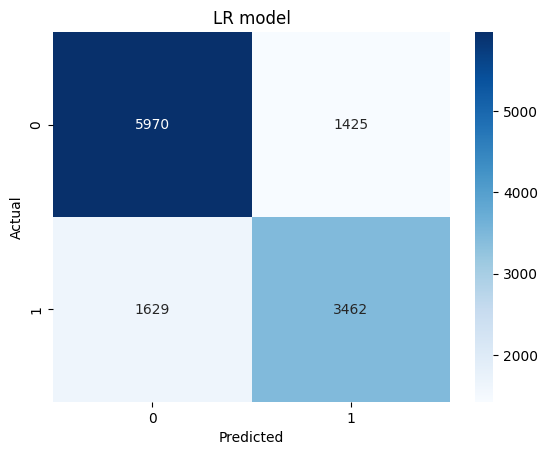

In [55]:
result_report(y_test_cut, rfc_pred, "RFC model")
result_report(y_test_cut, xgb_pred, "XGB model")
result_report(y_test_cut, svc_pred, "SVC model")
result_report(y_test_cut, lr_cut_pred, "LR model")


Note that all the models seems to perform at a simulare level

The svm model did perfrom the best on predicting patient with heart disease but the difference is minuscule and might just be an affect from the chosen randomstate

if we evaluate the models like we did the dataset we should go after macro avg f1 score and by that definiton the LR model wins

- We will also test the models on the real dataset. note that the data the models trained on is limited by 60k and has been balanced.
- the real dataset containes more than 300k and the test data is about 60k datapoints
- the huge differnce between the dataset we trained on and the real is that the real dataset is imbalanced.
- And as in real life the patient will be imblanced there will be less people who are sick and as such the model should be able to handle such data.

In [53]:
rfc_pred_test = rfc.predict(X_test)
xgb_model_pred_test = xgb_model.predict(X_test)
svc_pred_test = svc.predict(X_test)
lr_cut_test = lr_cut.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.82      0.90     56774
        True       0.31      0.92      0.46      4997

    accuracy                           0.83     61771
   macro avg       0.65      0.87      0.68     61771
weighted avg       0.94      0.83      0.86     61771



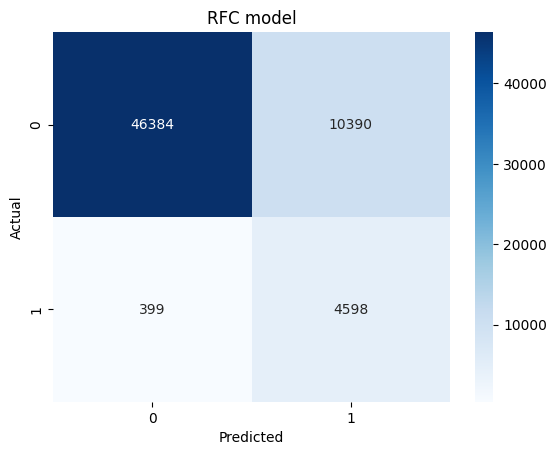

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.79      0.87     56774
        True       0.24      0.75      0.36      4997

    accuracy                           0.78     61771
   macro avg       0.60      0.77      0.61     61771
weighted avg       0.91      0.78      0.83     61771



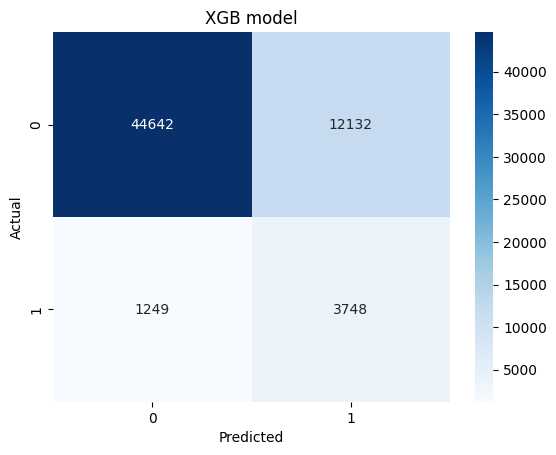

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.79      0.87     56774
        True       0.23      0.72      0.35      4997

    accuracy                           0.79     61771
   macro avg       0.60      0.76      0.61     61771
weighted avg       0.91      0.79      0.83     61771



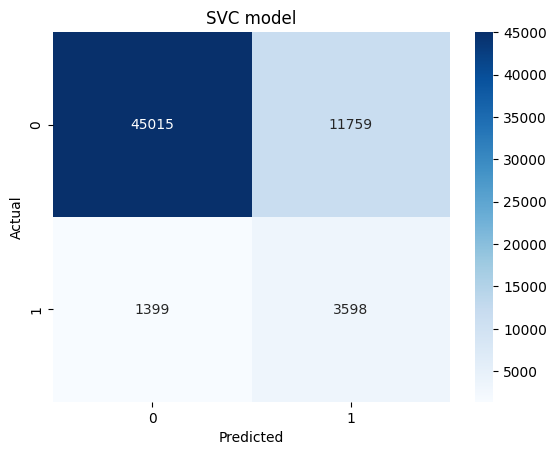

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.82      0.88     56774
        True       0.24      0.68      0.36      4997

    accuracy                           0.80     61771
   macro avg       0.61      0.75      0.62     61771
weighted avg       0.91      0.80      0.84     61771



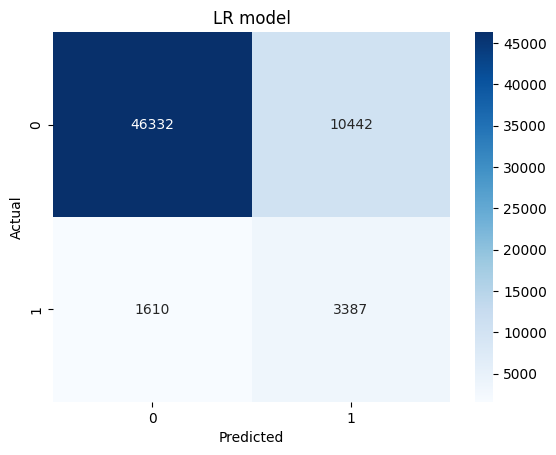

In [66]:
result_report(y_test,rfc_pred_test, "RFC model")
result_report(y_test,xgb_model_pred_test, "XGB model")
result_report(y_test,svc_pred_test, "SVC model")
result_report(y_test,lr_cut_test, "LR model")

In [60]:
#roc and auc curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred_test)
rfc_auc = auc(rfc_fpr, rfc_tpr)
xgb_model_fpr, xgb_model_tpr, _ = roc_curve(y_test, xgb_model_pred_test)
xgb_model_auc = auc(xgb_model_fpr, xgb_model_tpr)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_pred_test)
svc_auc = auc(svc_fpr, svc_tpr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_cut_test)
lr_auc = auc(lr_fpr, lr_tpr)

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=rfc_fpr, y=rfc_tpr, mode='lines', name=f'Random Forest (AUC = {rfc_auc:.2f})', line=dict(color=colors[1])))
fig.add_trace(go.Scatter(x=xgb_model_fpr, y=xgb_model_tpr, mode='lines', name=f'XGBoost (AUC = {xgb_model_auc:.2f})', line=dict(color=colors[3])))
fig.add_trace(go.Scatter(x=svc_fpr, y=svc_tpr, mode='lines', name=f'SVC (AUC = {svc_auc:.2f})', line=dict(color=colors[5])))
fig.add_trace(go.Scatter(x=lr_fpr, y=lr_tpr, mode='lines', name=f'Logistic Regression (AUC = {lr_auc:.2f})', line=dict(color=colors[7])))

fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve for Heart Disease', xaxis=dict(title='False Positive Rate'), yaxis=dict(title='True Positive Rate'), legend=dict(x=0.7, y=0.2), autosize=False, width=900, height=500, plot_bgcolor='white')
fig.show()

Note on this larger dataset the Randomforest model performed better on the real imbalanced dataset, which might imply that the model is more generalized

# model optimization

In [36]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [92]:
#find best params with grid search

param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [10, 20, None],
    "criterion":["gini", "entropy",],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3],
    "max_features": ["log2", "sqrt"],
    "bootstrap": [True, False],
    "random_state": [42]
}

rf = RandomForestClassifier()
# test XGBoost RandomForestClassifier as xgboost uses gpu instead of cpu

In [93]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=3,scoring='roc_auc')

grid_search.fit(X_train_cut, y_train_cut)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300], 'random_state': [42]},
             scoring='roc_auc', verbose=3)

In [94]:
# Best parameters
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}


In [95]:
grid_pred = grid_search.best_estimator_.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.81      0.88     56774
        True       0.26      0.78      0.39      4997

    accuracy                           0.81     61771
   macro avg       0.62      0.79      0.64     61771
weighted avg       0.92      0.81      0.85     61771



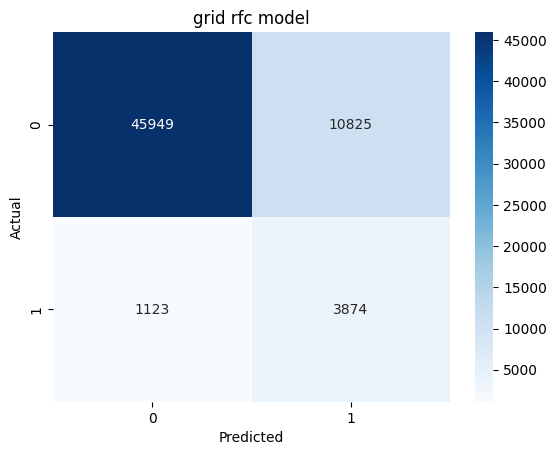

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.82      0.90     56774
        True       0.31      0.92      0.46      4997

    accuracy                           0.83     61771
   macro avg       0.65      0.87      0.68     61771
weighted avg       0.94      0.83      0.86     61771



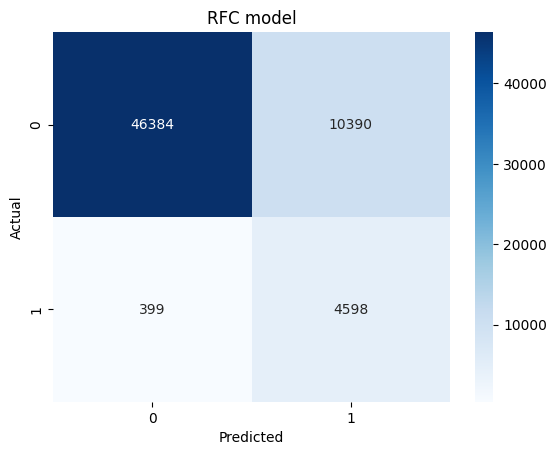

In [96]:
result_report(y_test,grid_pred, "grid rfc model")
result_report(y_test,rfc_pred_test, "RFC model")

In [97]:
grid_pred_temp = grid_search.best_estimator_.predict(X_train)
rfc_pred_temp = rfc.predict(X_train)

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.81      0.88    227109
        True       0.26      0.78      0.39     19974

    accuracy                           0.81    247083
   macro avg       0.62      0.79      0.64    247083
weighted avg       0.92      0.81      0.84    247083



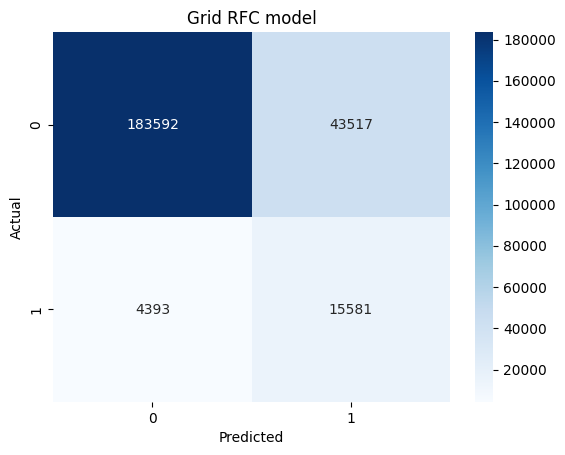

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.82      0.90    227109
        True       0.31      0.93      0.46     19974

    accuracy                           0.82    247083
   macro avg       0.65      0.87      0.68    247083
weighted avg       0.94      0.82      0.86    247083



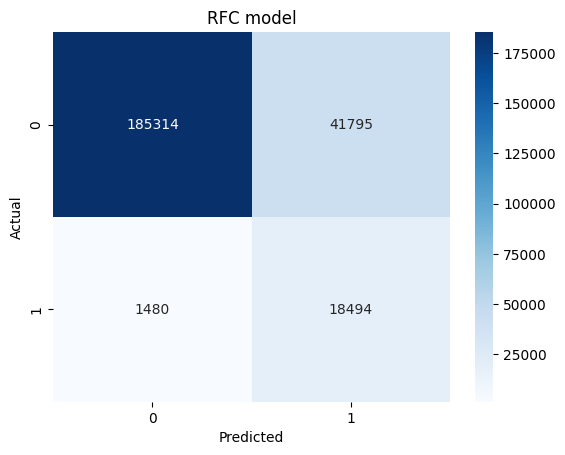

In [100]:
result_report(y_train,grid_pred_temp, "Grid RFC model")
result_report(y_train,rfc_pred_temp, "RFC model")

In [103]:
#grid search did not find a model which could perform better than the default randomforest, i any capacity
#default setting might just be better on general data.
#roc and auc curve
main_rfc_fpr, main_rfc_tpr, _ = roc_curve(y_train, rfc_pred_temp)
main_rfc_auc = auc(main_rfc_fpr, main_rfc_tpr)
grid_rfc_fpr, grid_rfc_tpr, _ = roc_curve(y_train, grid_pred_temp)
grid_rfc_auc = auc(grid_rfc_fpr, grid_rfc_tpr)



fig = go.Figure()
fig.add_trace(go.Scatter(x=main_rfc_fpr, y=main_rfc_tpr, mode='lines', name=f'Random Forest (AUC = {main_rfc_auc:.2f})', line=dict(color=colors[1])))
fig.add_trace(go.Scatter(x=grid_rfc_fpr, y=grid_rfc_tpr, mode='lines', name=f'Gridsearch Random Forest (AUC = {grid_rfc_auc:.2f})', line=dict(color=colors[3])))

fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve for Heart Disease', xaxis=dict(title='False Positive Rate'), yaxis=dict(title='True Positive Rate'), legend=dict(x=0.7, y=0.2), autosize=False, width=900, height=500, plot_bgcolor='white')
fig.show()

In [107]:
# save model

joblib.dump(rfc, "rfc.pkl",compress=3)

['rfc.pkl']

In [18]:
#save standard scaler
cvd_cut = pd.read_csv("cvd_manually_cut.csv")

numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                         'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    
scaler = StandardScaler().fit(cvd_cut[numerical_columns])
joblib.dump(scaler, "scaler.bin")


['scaler.bin']

In [2]:
model = joblib.load("rfc.pkl")

In [4]:
input_data = pd.DataFrame({
        'Height_(cm)': [186],
        'Weight_(kg)': [120],
        'BMI': [36],
        'Alcohol_Consumption': [27],
        'Fruit_Consumption': [4],
        'Green_Vegetables_Consumption': [3],
        'FriedPotato_Consumption': [60],
        'General_Health_Fair': [0],
        'General_Health_Good': [0],
        'General_Health_Poor': [1],
        'General_Health_Very Good': [0],
        'Checkup_5 or more years ago': [1],
        'Checkup_Within the past 2 years': [0],
        'Checkup_Within the past 5 years': [0],
        'Checkup_Within the past year': [0],
        'Exercise_Yes': [0],
        'Skin_Cancer_Yes': [0],
        'Other_Cancer_Yes': [0],
        'Depression_Yes': [1],
        'Diabetes_No, pre-diabetes or borderline diabetes': [0],
        'Diabetes_Yes': [1],
        'Diabetes_Yes, but female told only during pregnancy': [0],
        'Arthritis_Yes': [1],
        'Sex_Male': [1],
        'Age_Category_25-29': [0],
        'Age_Category_30-34': [0],
        'Age_Category_35-39': [0],
        'Age_Category_40-44': [0],
        'Age_Category_45-49': [0],
        'Age_Category_50-54': [0],
        'Age_Category_55-59': [0],
        'Age_Category_60-64': [0],
        'Age_Category_65-69': [1],
        'Age_Category_70-74': [0],
        'Age_Category_75-79': [0],
        'Age_Category_80+': [0],
        'Smoking_History_yes': [1], 
    })

In [25]:
def create_pred_input_data(df):
    numerical_columns = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                         "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]
    
    scaler = joblib.load("scaler.bin")
    X_scaled = scaler.transform(df[numerical_columns])
    categorical_columns = df.drop(numerical_columns, axis=1) 
    full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])
    return full_data

In [29]:
processed_data = create_pred_input_data(input_data)

In [30]:
processed_data

array([[ 1.42847401,  1.64797036,  1.07780649,  2.71658932, -1.0189884 ,
        -0.79689656,  6.16553328,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [31]:
# Make the prediction
prediction = model.predict(processed_data)

In [32]:
prediction

array([ True])

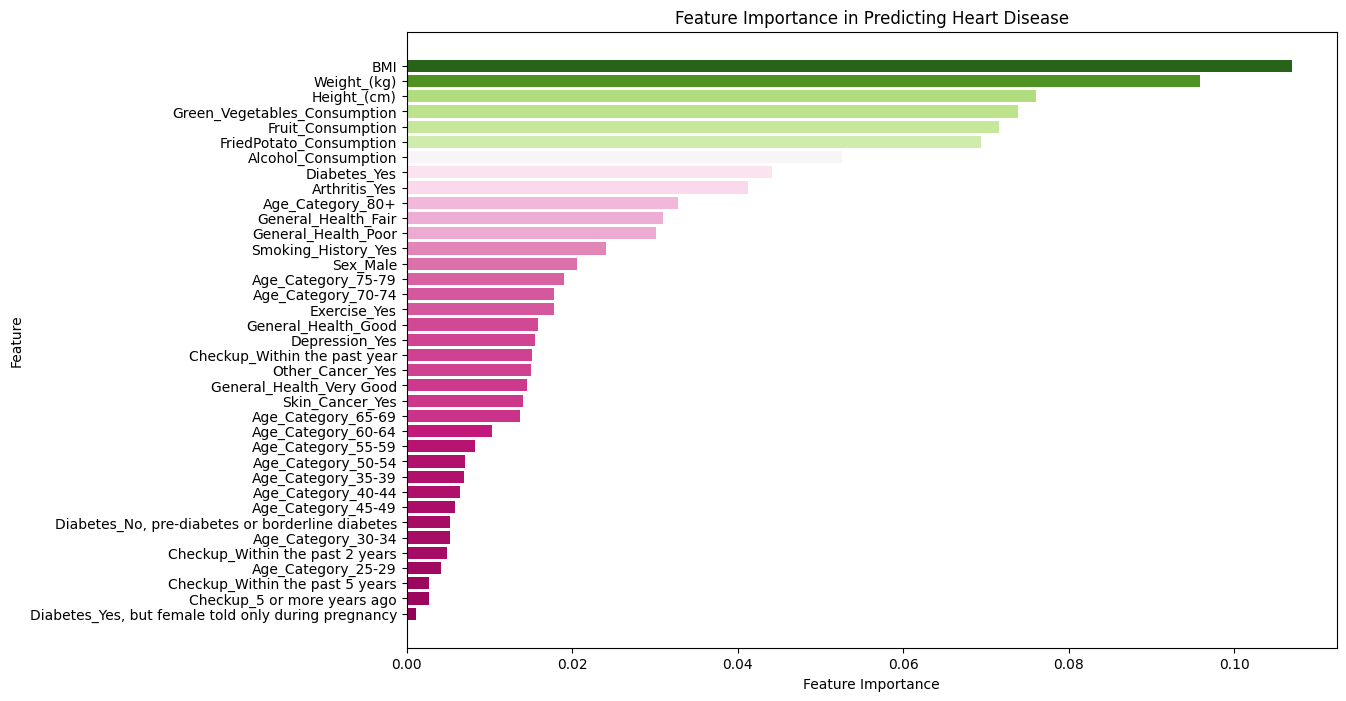

In [48]:


X = cvd_cut.drop("Heart_Disease_Yes", axis=1)

feature_importances = model.feature_importances_
numerical_columns = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                         "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]
categorical_columns = X.drop(numerical_columns, axis=1) 

feature_names = numerical_columns + categorical_columns.columns.tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by the 'Importance' column in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

colors = cm.PiYG(importance_df['Importance'] / max(importance_df['Importance']))

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Heart Disease")
plt.gca().invert_yaxis()  # Optional: Invert y-axis for descending order
plt.show()
